In [2]:
%load_ext autoreload
%autoreload 2
%aimport helper_blending
%aimport blending
import cv2
import matplotlib.pyplot as plt
import numpy as np
import helper_blending
import blending

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
PATH = "D:/Maestria/CodigoMilton/uni_03_epi/images/"
img_one = cv2.cvtColor(cv2.imread(PATH + "paisaje.jpg",1), cv2.COLOR_BGR2RGB)
img_two = cv2.cvtColor(cv2.imread(PATH + "jet.jpg",1), cv2.COLOR_BGR2RGB)
img_two_mask = cv2.cvtColor(cv2.imread(PATH + "mask_jet.jpg",1), cv2.COLOR_BGR2RGB)
#display(img_two_mask)

print(20*"#","TAMAÑO DE LAS IMÁGENES",20*"#",end="\n\n")
print("IMG ONE (height, width, depth):",img_one.shape)
print("IMG DOS (height, width, depth):",img_two.shape)

print("\n",20*"#","IMÁGENES INICIALES",20*"#",end="\n\n")
helper.display_image(img_one, True)
helper.display_image(img_two, True)
helper.display_image(img_two_mask, True)

# Datos de imágen: Normalizar imágenes
# Often image normalization is used to increase contrast which aids in improved feature extraction or image segmentation.
# Often times Image Normalization is used to remove noise from the picture (data).
img_one = cv2.normalize(img_one.astype('float'), None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX)
img_two = cv2.normalize(img_two.astype('float'), None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX)
img_two_mask = cv2.normalize(img_two_mask.astype('float'), None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX)

#helper.display_image(img_two_mask)
#display(img_two_mask)

#################### TAMAÑO DE LAS IMÁGENES ####################

IMG ONE (height, width, depth): (461, 614, 3)
IMG DOS (height, width, depth): (300, 400, 3)

 #################### IMÁGENES INICIALES ####################



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


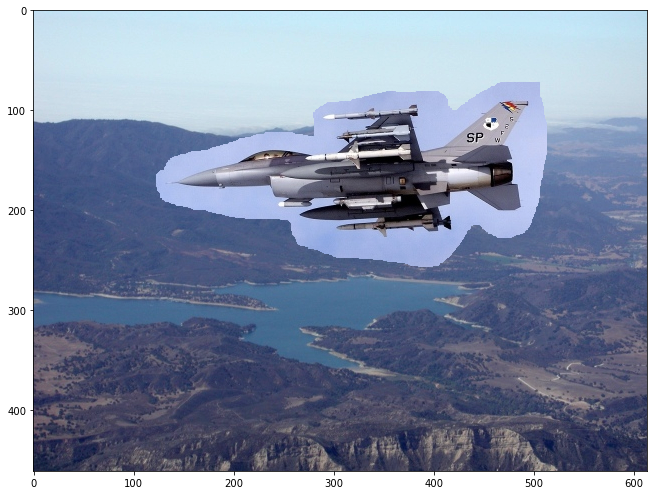

True

In [7]:
# Datos de imágen: Normalizar imágenes
img_two_dim =  [20,120]

#Naive Blend
#print(img_one)
img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix = helper.dim_fix(img_two, img_two_mask, img_one, img_two_dim)
naive_img, img_one_blend = blending.naive_image(img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix)
#print(img_one)
helper.display_image(naive_img, True)
helper.display_image(img_one_blend, True)

# save image
img_one_blend = img_one_blend * 255
img_one_blend = img_one_blend.astype(np.uint8)
cv2.imwrite(PATH +'naive_image.jpg', cv2.cvtColor(img_one_blend, cv2.COLOR_RGB2BGR))
#helper.display_image(img_one_blend, True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


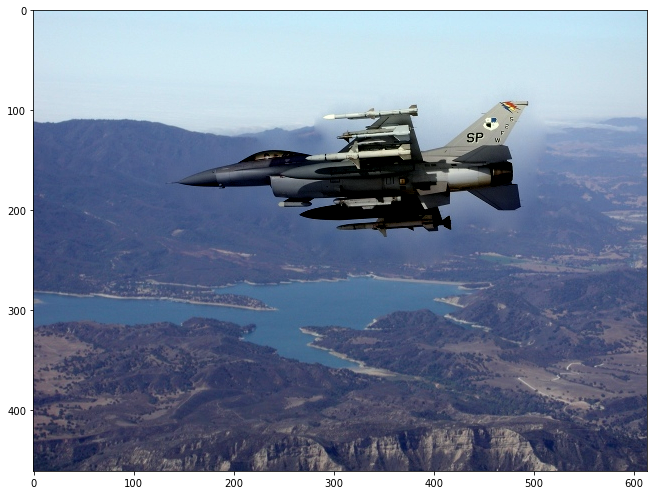

True

In [8]:
#Poisson Blend
img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix = helper.dim_fix(img_two, img_two_mask, img_one, img_two_dim)
img_one_blend = blending.blend_image(img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix, False)

helper.display_image(img_one_blend, True)

# plot results
img_one_blend = np.clip(img_one_blend,0.0,1.0)
	
# save image
img_one_blend = img_one_blend * 255
img_one_blend = img_one_blend.astype(np.uint8)
cv2.imwrite(PATH +'poisson_image.jpg', cv2.cvtColor(img_one_blend, cv2.COLOR_RGB2BGR))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


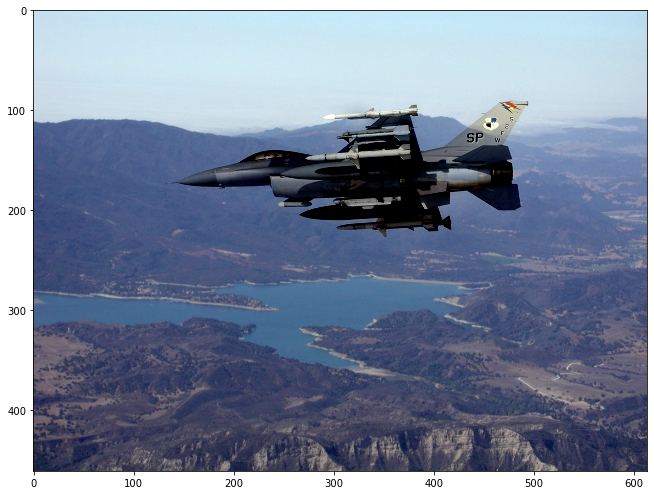

True

In [9]:
#Mixed Blend
img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix = helper.dim_fix(img_two, img_two_mask, img_one, img_two_dim)
img_one_blend = blending.blend_image(img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix, True)

helper.display_image(img_one_blend, True)

# plot results
img_one_blend = np.clip(img_one_blend,0.0,1.0)

# save image
img_one_blend = img_one_blend * 255
img_one_blend = img_one_blend.astype(np.uint8)
cv2.imwrite(PATH +'mixed_image.jpg', cv2.cvtColor(img_one_blend, cv2.COLOR_RGB2BGR))